In [1]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#Importing libraries
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
df = pd.read_csv(r'DG_preprocessing.csv')
df.reset_index(drop=True,inplace=True)
print(df.shape)
df.head()

(54037, 3)


,label,full_text,digit
0,False,abortion says annies list political group supp...,0
1,True,energy history job accomplishments decline coa...,1
2,True,foreign policy hillary clinton agrees john mcc...,1
3,True,education chicago bears starting quarterbacks ...,1
4,True,ethics m person stage worked actively just las...,1


## Explaratory Data Analysis (EDA)

#### Exploring the division in the Target label.

In [3]:
# df.columns

for col in df.columns:
    print(col)

label
full_text
digit


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54037 entries, 0 to 54036
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   label      54037 non-null  bool  
 1   full_text  54037 non-null  object
 2   digit      54037 non-null  int64 
dtypes: bool(1), int64(1), object(1)
memory usage: 897.2+ KB


C:\Users\vaibh\AppData\Local\Temp\ipykernel_5544\1322746137.py:8: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, dfi in enumerate(df.groupby(["label"])):


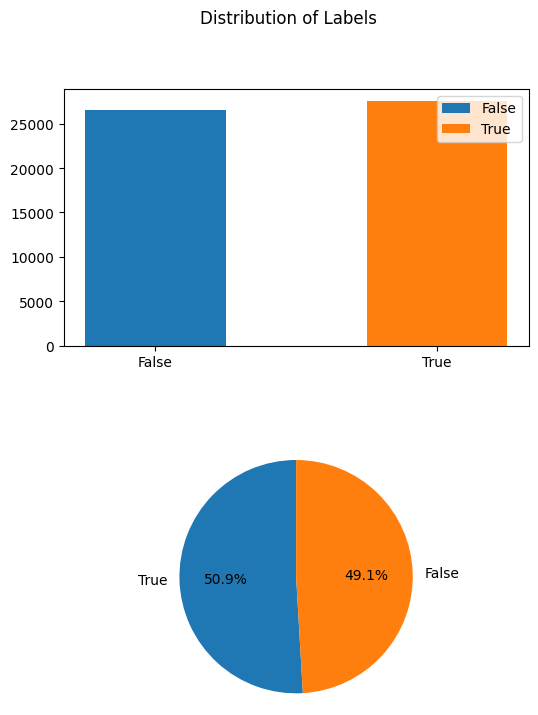

In [5]:
import matplotlib.pyplot as plt

# Create a grid of subplots with 2 rows and 1 column
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 8))

# Bar plot
labels = []
for i, dfi in enumerate(df.groupby(["label"])):
    labels.append(dfi[0])
    ax1.bar(i, dfi[1].count(), width=0.5, label=dfi[0])  # Adjust the width of the bars as needed

ax1.set_xticks(range(len(labels)))
ax1.set_xticklabels(labels)
ax1.legend(loc='upper right')

# Pie plot
label_counts = df['label'].value_counts()
ax2.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=90)
ax2.axis('equal')  # Equal aspect ratio ensures a circular pie

# Set spacing between the subplots
plt.subplots_adjust(hspace=0.4)

# Set the overall title for the figure
fig.suptitle('Distribution of Labels')

plt.show()


In [6]:
#Performing text vectorization
Vectorizer = TfidfVectorizer()
X = Vectorizer.fit_transform(df['full_text'])
y = df['label']

# print(X_Train)
# print(X_Test)

In [7]:
# X = df[columns]
# y = df[['label']]

In [8]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection  import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 5)

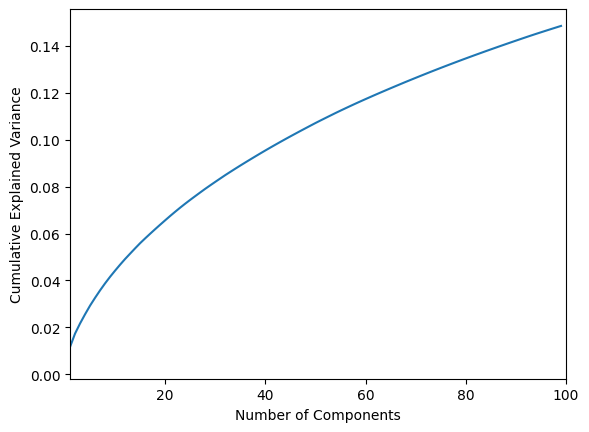

In [9]:
from sklearn.decomposition import TruncatedSVD
import numpy as np

# Perform TruncatedSVD
svd = TruncatedSVD(n_components=100)  # Specify the desired number of components
X_svd = svd.fit_transform(X)

# Plot explained variance ratio
explained_variance_ratio = np.cumsum(svd.explained_variance_ratio_)
plt.plot(explained_variance_ratio)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.xlim([1, 100])
plt.show()


In [10]:
#Using Principal Dimensional Reduction
from sklearn.decomposition import PCA
pca = PCA(n_components = 4)

In [11]:
from sklearn.decomposition import TruncatedSVD
import pandas as pd

# Create an instance of TruncatedSVD
svd = TruncatedSVD(n_components=100)  # Specify the desired number of components

# Fit and transform the training data
X_train = svd.fit_transform(X_train)

# Transform the test data
X_test = svd.transform(X_test)

# Get the explained variance ratio
explained_variance = svd.explained_variance_ratio_

# Create a DataFrame to store the explained variance
pca_df = pd.DataFrame(explained_variance)


In [12]:
# !pip install lazypredict


In [13]:
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
print(models)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [44:06<00:00, 91.25s/it]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
SVC                                0.91               0.91     0.91      0.91   
XGBClassifier                      0.91               0.91     0.91      0.91   
RandomForestClassifier             0.91               0.90     0.90      0.91   
LGBMClassifier                     0.90               0.90     0.90      0.90   
ExtraTreesClassifier               0.90               0.90     0.90      0.90   
LinearSVC                          0.90               0.90     0.90      0.90   
RidgeClassifierCV                  0.90               0.90     0.90      0.90   
RidgeClassifier                    0.90               0.90     0.90      0.90   
LinearDiscriminantAnalysis         0.90               0.90     0.90      0.90   
CalibratedClassifierCV             0.90               0.90     0.90      0.90   
LogisticRegression          

In [14]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
SVC,0.91,0.91,0.91,0.91,196.75
XGBClassifier,0.91,0.91,0.91,0.91,21.53
RandomForestClassifier,0.91,0.90,0.90,0.91,57.63
LGBMClassifier,0.90,0.90,0.90,0.90,2.31
ExtraTreesClassifier,0.90,0.90,0.90,0.90,13.91
LinearSVC,0.90,0.90,0.90,0.90,15.69
RidgeClassifierCV,0.90,0.90,0.90,0.90,1.11
RidgeClassifier,0.90,0.90,0.90,0.90,0.43
LinearDiscriminantAnalysis,0.90,0.90,0.90,0.90,1.77


In [15]:
models.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, SVC to DummyClassifier
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Accuracy           27 non-null     float64
 1   Balanced Accuracy  27 non-null     float64
 2   ROC AUC            27 non-null     float64
 3   F1 Score           27 non-null     float64
 4   Time Taken         27 non-null     float64
dtypes: float64(5)
memory usage: 1.3+ KB


In [16]:
sorted_models = models.sort_values(by='Accuracy', ascending=False)

In [17]:
sorted_models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
SVC,0.91,0.91,0.91,0.91,196.75
XGBClassifier,0.91,0.91,0.91,0.91,21.53
RandomForestClassifier,0.91,0.90,0.90,0.91,57.63
ExtraTreesClassifier,0.90,0.90,0.90,0.90,13.91
LGBMClassifier,0.90,0.90,0.90,0.90,2.31
LinearSVC,0.90,0.90,0.90,0.90,15.69
RidgeClassifierCV,0.90,0.90,0.90,0.90,1.11
RidgeClassifier,0.90,0.90,0.90,0.90,0.43
LinearDiscriminantAnalysis,0.90,0.90,0.90,0.90,1.77


In [18]:
models.shape

(27, 5)

In [19]:
# #Creating and train the Decision Tree model
# KNNModel = KNeighborsClassifier(n_neighbors=5)  
# KNNModel.fit(X_train, y_train)

In [20]:
# #Making predictions on the testing set
# Y_Pred = KNNModel.predict(X_test)

In [21]:
# from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support

# # Print classification report
# print("Classification Report:")
# report = classification_report(y_test, Y_Pred, target_names=['fake', 'real'])
# print(report)

# # Calculate and print accuracy
# accuracy = accuracy_score(y_test, Y_Pred)
# print("Accuracy: {:.2f}%".format(accuracy * 100))

# # Calculate precision, recall, and F1-score
# precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, Y_Pred, average=None)

# # Print precision, recall, and F1-score in percentage
# print("Precision (Fake): {:.2f}%".format(precision[0] * 100))
# print("Precision (Real): {:.2f}%".format(precision[1] * 100))
# print("Recall (Fake): {:.2f}%".format(recall[0] * 100))
# print("Recall (Real): {:.2f}%".format(recall[1] * 100))
# print("F1-Score (Fake): {:.2f}%".format(f1_score[0] * 100))
# print("F1-Score (Real): {:.2f}%".format(f1_score[1] * 100))